In [27]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.stats.moments import rolling_mean
from pandas.stats.moments import rolling_window
from IPython.display import display

%matplotlib inline

In [28]:
df=sm.datasets.sunspots.load_pandas().data
print type(df)
print df.head()

<class 'pandas.core.frame.DataFrame'>
   YEAR  SUNACTIVITY
0  1700            5
1  1701           11
2  1702           16
3  1703           23
4  1704           36


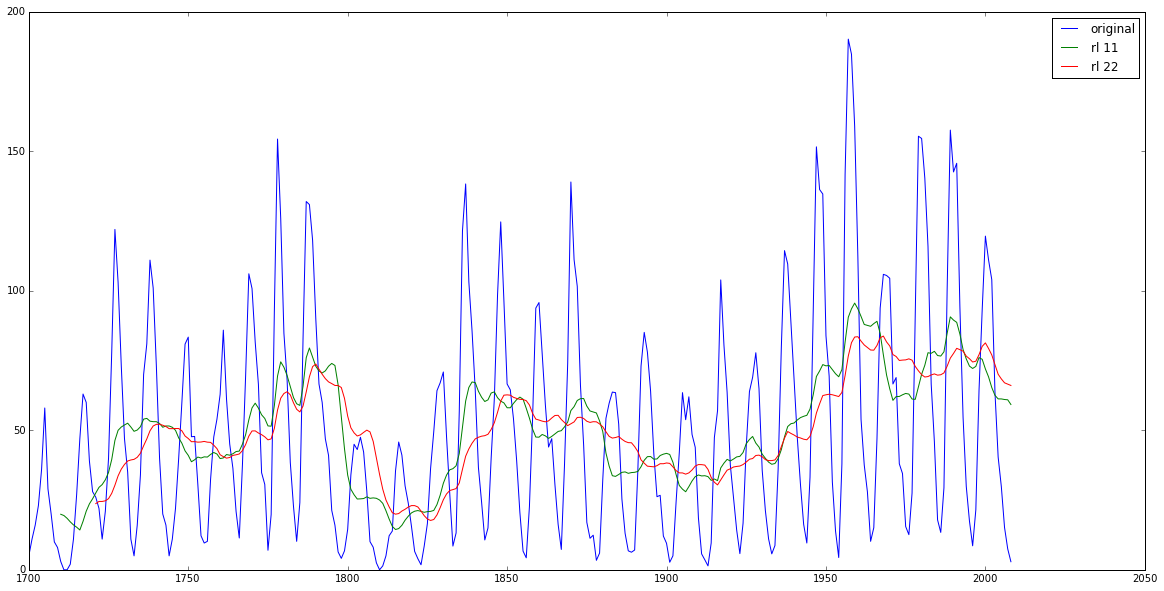

In [30]:
# plot sun-activity vs year
plt.figure(figsize=(20,10))
plt.plot(df.YEAR, df.SUNACTIVITY, label="original")
plt.plot(df.YEAR, rolling_mean(df,11).SUNACTIVITY, label="rl 11")
plt.plot(df.YEAR, rolling_mean(df,22).SUNACTIVITY, label="rl 22")
plt.legend()

plt.show()

In [39]:
df=df.tail(150)
df=df.set_index('YEAR', drop=True)
display(df.head())

,SUNACTIVITY
YEAR,
1859,93.8
1860,95.8
1861,77.2
1862,59.1
1863,44.0


In [44]:
def plot_window(win_type):
    df2=rolling_window(df, 22, win_type)
    df2.columns=[win_type]
    df2.plot(ax=ax)

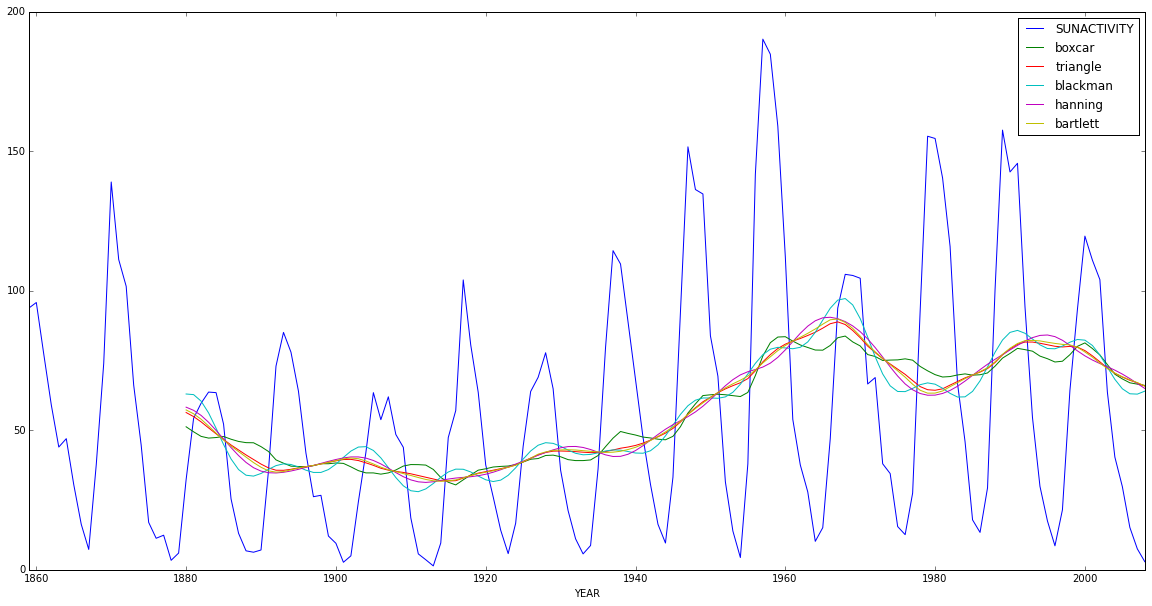

In [46]:
ax=df.plot(figsize=(20,10))
plot_window('boxcar')
plot_window('triangle')
plot_window('blackman')
plot_window('hanning')
plot_window('bartlett')
plt.show()

In [48]:
import statsmodels.api as sm
from pandas.stats.moments import rolling_window
import pandas as pd
import statsmodels.tsa.stattools as ts
import numpy as np

In [50]:
def calc_adf(x,y):
    result = sm.OLS(x,y).fit()
    return ts.adfuller(result.resid)

In [52]:
data=df.values
N=len(data)

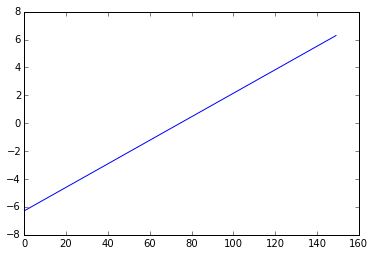

In [55]:
t=np.linspace(-2*np.pi, 2*np.pi, N)
plt.plot(t)

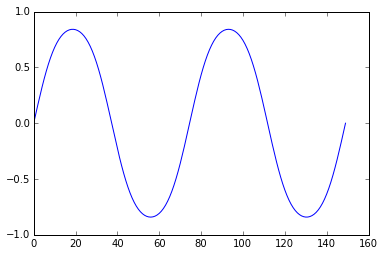

In [57]:
sine=np.sin(np.sin(t))
plt.plot(sine)

In [58]:
print "self ADF", calc_adf(sine,sine)

self ADF (-2.1491208607641985e-16, 0.95853208606005602, 0, 149, {'5%': -2.8811408028842043, '1%': -3.4750180242954167, '10%': -2.577221358046935}, -9892.8108679318029)


In [59]:
noise=np.random.normal(0,.01,N)
print "self ADF with noise", calc_adf(sine, sine+noise)

self ADF with noise (-13.807462325120101, 8.3504975233143921e-26, 0, 149, {'5%': -2.8811408028842043, '1%': -3.4750180242954167, '10%': -2.577221358046935}, -883.47875560402804)


In [60]:
cosine=100*np.cos(t)+10
print "ADF sine vs cosine with noise", calc_adf(sine, cosine+noise)

ADF sine vs cosine with noise (-16.11051244177029, 5.0189561015860128e-29, 14, 135, {'5%': -2.8831982218157801, '1%': -3.479742586699182, '10%': -2.5783196844993141}, -4647.3420552507569)


In [61]:
print "Sine vs sunspots", calc_adf(sine, data)

Sine vs sunspots (-4.2563263993513294, 0.0005282642945000066, 11, 138, {'5%': -2.8827217656441682, '1%': -3.4786478891750301, '10%': -2.5780653266120561}, -981.76127848801343)


In [73]:
# calculate mean of sunspot data
y=data-np.mean(data)
norm=np.sum(y**2)
print norm

295987.897933


(150,)


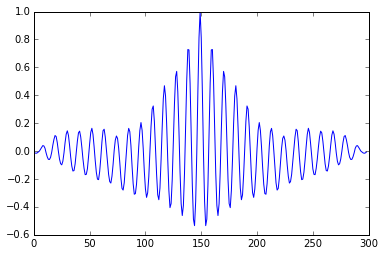

In [74]:
y=y[:,0]
print y.shape
correlated=np.correlate(y,y,mode='full')/norm
plt.plot(correlated)

In [75]:
res=correlated[len(correlated)/2:]

In [77]:
# this gives us the last 5 
print np.argsort(res)[-5:]

[21 10 11  1  0]


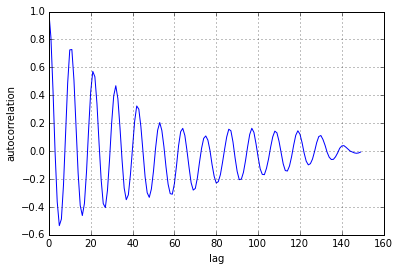

In [78]:
plt.plot(res)
plt.grid(True)
plt.xlabel("lag")
plt.ylabel("autocorrelation")
plt.show()

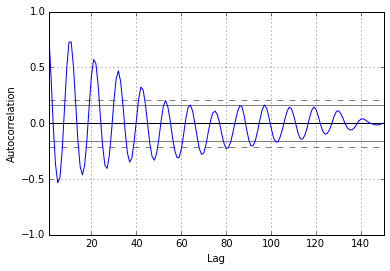

In [80]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(data)

In [92]:
from scipy.optimize import leastsq

In [83]:
# set up a model
def model(p, x1, x10):
    p1, p10=p
    return p1*x1+p10*x10

In [84]:
def error(p, data, x1, x10):
    return data-model(p,x1,x10)

In [97]:
def fit(data):
    p0=[0.5,0.5]
    params=leastsq(error, p0, args=(data[10:], data[9:-1], data[:-10]))[0]
    return params

In [98]:
data_=data[:,0]
cutoff=0.9*len(data_)
params=fit(data_[:cutoff])
print params

[ 0.56667536  0.46549996]


In [95]:
data[:,0].shape

(150,)

In [99]:
actual=data_[cutoff:]
print actual.shape

(15,)


In [103]:
lag1=data_[cutoff-1:-1]
print lag1.shape
lag2=data_[cutoff-10:-10]

(15,)


In [104]:
print actual
print
print lag1

[  29.9   17.5    8.6   21.5   64.3   93.3  119.6  111.   104.    63.7
   40.4   29.8   15.2    7.5    2.9]

[  54.6   29.9   17.5    8.6   21.5   64.3   93.3  119.6  111.   104.
   63.7   40.4   29.8   15.2    7.5]


In [105]:
prediction=params[0]*lag1+params[1]*lag2
print prediction.shape

(15,)


In [109]:
error=np.sqrt(np.mean((actual-prediction)**2))
print error

14.6025592659


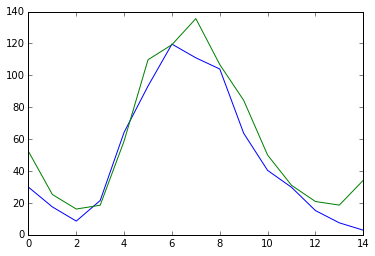

In [112]:
plt.plot(actual)
plt.plot(prediction)

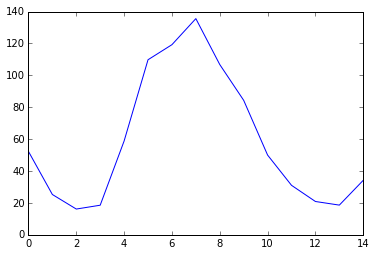

In [111]:
plt.plot(prediction)

In [113]:
print "hello I am awake"

hello I am awake


In [131]:
from scipy.optimize import leastsq
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [115]:
def model(p, t):
    C, p1, f1, phi1 , p2, f2, phi2, p3, f3, phi3 = p
    return C + p1 * np.sin(f1 * t + phi1) + p2 * np.sin(f2 * t + phi2) +p3 * np.sin(f3 * t +     phi3)


In [116]:
def error(p,y,t):
    return y-model(p,t)

In [117]:
def fit(y,t):
    p0 = [y.mean(), 0, 2 * np.pi/11, 0, 0, 2 * np.pi/22, 0, 0, 2 * np.pi/100, 0]
    params=leastsq(error, p0, args=(y,t))[0]
    return params

In [118]:
data_loader=sm.datasets.sunspots.load_pandas()

In [121]:
sunspots=data_loader.data.SUNACTIVITY.values
type(sunspots)

numpy.ndarray

In [122]:
years=data_loader.data.YEAR.values

In [125]:
cutoff=0.9*len(sunspots)
print cutoff
params=fit(sunspots[:cutoff], years[:cutoff])


278.1


In [126]:
print params

[ 47.1880006   28.89947462   0.56827279   6.51178464   4.55214564
   0.29372076 -14.30924768 -18.16524123   0.06574835  -4.37789476]


In [128]:
pred=model(params, years[cutoff:])
actual=sunspots[cutoff:]

Root mean square error 59.5620559792
Mean absolute error 44.5815847015
Mean absolute percentage error 65.1645834877
Symmetric Mean absolute percentage error 78.4480696873
Coefficient of determination -0.36353154899


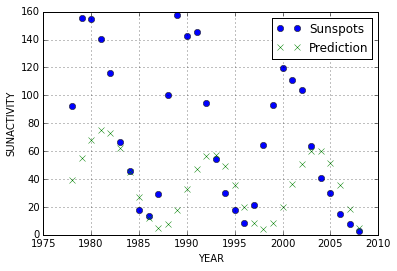

In [132]:
print "Root mean square error", np.sqrt(np.mean((actual - pred) ** 2))
print "Mean absolute error", np.mean(np.abs(actual - pred))
print "Mean absolute percentage error", 100 * np.mean(np.abs(actual - pred)/actual)
mid = (actual + pred)/2
 
print "Symmetric Mean absolute percentage error", 100 * np.mean(np.abs(actual - pred)/mid)
print "Coefficient of determination", 1 - ((actual - pred) ** 2).sum()/ ((actual - actual.mean()) ** 2).sum()

year_range = data_loader.data["YEAR"].values[cutoff:]

plt.plot(year_range, actual, 'o', label="Sunspots")
plt.plot(year_range, pred, 'x', label="Prediction")
plt.grid(True)
plt.xlabel("YEAR")
plt.ylabel("SUNACTIVITY")
plt.legend()
plt.show()


In [133]:
from scipy.fftpack import rfft
from scipy.fftpack import fftshift

In [134]:
t=np.linspace(-2*np.pi, 2*np.pi, len(sunspots))

In [136]:
print type(t)
print t.shape

<type 'numpy.ndarray'>
(309,)


95.1


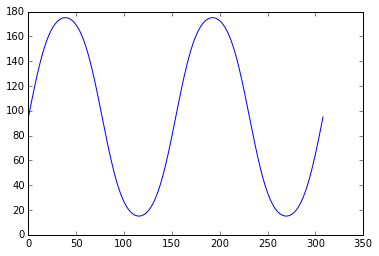

In [140]:
mid=np.ptp(sunspots)/2
print mid
sine=mid+mid*np.sin(np.sin(t))
plt.plot(sine)

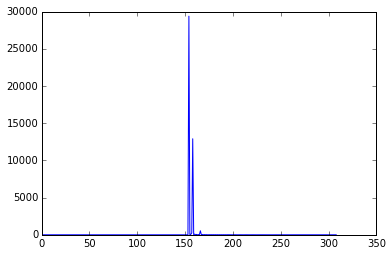

In [142]:
sine_fft=np.abs(fftshift(rfft(sine)))
plt.plot(sine_fft)

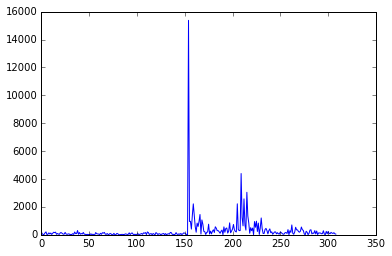

In [144]:
sunspots_fft=np.abs(fftshift(rfft(sunspots)))
plt.plot(sunspots_fft)

In [146]:
# compute 5 highest indices
print np.argsort(sunspots_fft)[-5:]

[205 212 215 209 154]


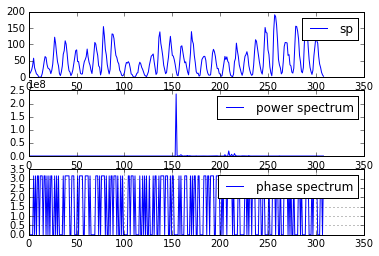

In [148]:
sp_fft=fftshift(rfft(sunspots))
plt.subplot(311)
plt.plot(sunspots, label='sp')
plt.legend()
plt.subplot(312)
plt.plot(sp_fft**2, label='power spectrum')
plt.legend()
plt.subplot(313)
plt.plot(np.angle(sp_fft), label='phase spectrum')
plt.grid(True)
plt.legend()
plt.show()

In [149]:
from scipy.signal import medfilt
from scipy.signal import wiener
from scipy.signal import detrend

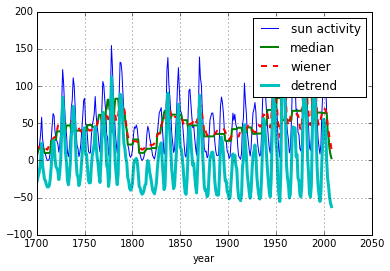

In [155]:
plt.plot(years, sunspots, label='sun activity')
plt.plot(years, medfilt(sunspots,11), lw=2, label='median')
plt.plot(years, wiener(sunspots,11), '--', lw=2, label='wiener')
plt.plot(years, detrend(sunspots), lw=3, label='detrend')
plt.xlabel("year")
plt.grid(True)
plt.legend()

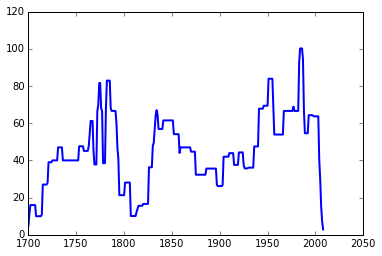

In [ ]:
plt.plot(years, medfilt(sunspots,11), lw=2, label='median')